In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (10,10)

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

In [13]:
fe_model = tf.keras.models.load_model('./models/resnet_conv2_block3_out.h5')

In [14]:
fe_model.compute_output_shape((1, 512, 512, 3))

TensorShape([1, 128, 128, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3264, 1836, 3) 255
(815, 460, 3) 1.0


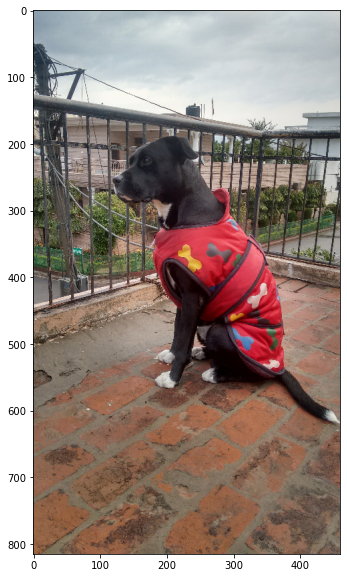

In [15]:
img = plt.imread('./data/shiro.jpg')
print(img.shape, img.max())
img = tf.image.resize(img, (815, 460), method=tf.image.ResizeMethod.LANCZOS3)
img = img/img.numpy().max()
print(img.shape, img.numpy().max())
plt.imshow(img)

In [17]:
data = tf.Variable(initial_value=tf.expand_dims(img, 0), trainable=True)
optimizer = tf.keras.optimizers.SGD()
for i in range(4500):
    with tf.GradientTape(watch_accessed_variables=False) as tape:
        tape.watch(data)
        act = fe_model(data)
        obj = 10*tf.reduce_sum(act[:, :, :, 1]) + 0.001*tf.reduce_sum(tf.image.total_variation(data))

    grad = -tape.gradient(obj, data)
    optimizer.apply_gradients(zip([grad], [data]))
    if i % 500 == 0:
        print("Iter = {}, Objective = {:.3}".format(i, obj))

Iter = 0, Objective = 5.94e+05
Iter = 500, Objective = 1.24e+06
Iter = 1000, Objective = 1.42e+06
Iter = 1500, Objective = 1.52e+06
Iter = 2000, Objective = 1.6e+06
Iter = 2500, Objective = 1.66e+06
Iter = 3000, Objective = 1.7e+06
Iter = 3500, Objective = 1.75e+06
Iter = 4000, Objective = 1.78e+06


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


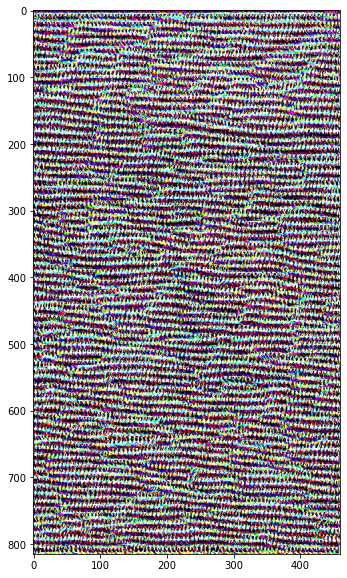

In [18]:
img_max_act = data[0].numpy()
plt.imshow(img_max_act)

In [19]:
fe_model = tf.keras.models.load_model('./models/resnet_conv3_block4_out.h5')

In [20]:
fe_model.compute_output_shape((1, 512, 512, 3))

TensorShape([1, 64, 64, 512])

In [21]:
data = tf.Variable(initial_value=tf.expand_dims(img, 0), trainable=True)
optimizer = tf.keras.optimizers.SGD()
for i in range(4500):
    with tf.GradientTape(watch_accessed_variables=False) as tape:
        tape.watch(data)
        act = fe_model(data)
        obj = 10*tf.reduce_sum(act[:, :, :, 0]) + 0.001*tf.reduce_sum(tf.image.total_variation(data))

    grad = -tape.gradient(obj, data)
    optimizer.apply_gradients(zip([grad], [data]))
    if i % 500 == 0:
        print("Iter = {}, Objective = {:.3}".format(i, obj))

Iter = 0, Objective = 1.92e+04
Iter = 500, Objective = 3.17e+04
Iter = 1000, Objective = 3.78e+04
Iter = 1500, Objective = 4.45e+04
Iter = 2000, Objective = 5.22e+04
Iter = 2500, Objective = 6.31e+04
Iter = 3000, Objective = 7.64e+04
Iter = 3500, Objective = 9.23e+04
Iter = 4000, Objective = 1.1e+05


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


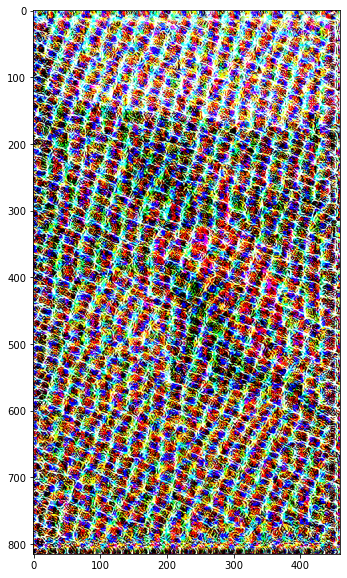

In [22]:
img_max_act = data[0].numpy()
plt.imshow(img_max_act)